# Land Cover colour scheme loaded from file

this notebook goes through loading the Land Cover colour schemes from the test file and using them with imshow plotting.

Running this code requiers the files draft_plot_land_cover.py and draft_lc_colour_definitions.txt to be located in the same folder as this notebook. 

In [27]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import math

import sys
sys.path.insert(1, '../Tools/')
from matplotlib import colors as mcolours
from dea_tools.plotting import display_map

from draft_plot_land_cover import plot_land_cover, lc_animation, lc_colours, lc_colourmap


### Connect to the datacube
Connect the datacube database, which provides functionality for loading and displaying stored Earth observation data.

In [28]:
dc = datacube.Datacube(app='DEA_Land_Cover')

### load data

select location and load Land Cover data

In [29]:
# Coordinates for Broome, Western Australia 
# lat = -18.10
# lon = 122.32
#cubby station cotton farm
# lake Wallawalla
lat, lon = (-28.7448, 147.9323)


lat_buffer = 0.18
lon_buffer = 0.18

# Combine central coordinates with buffer values to create the latitude and longitude range for the analysis 
lat_range = (lat - 0.1, lat + 0.2)
lon_range = (lon - 0.3, lon + 0.2)

# Set the range of dates for the analysis
time_range = ('2000', '2020')

In [30]:
# Create the 'query' dictionary object, which contains the longitudes, latitudes and time defined above
query = {
    'y': lat_range,
    'x': lon_range,
    'time': time_range,
}

# Load DEA Land Cover data from the datacube
lc = dc.load(product='ga_ls_landcover_class_cyear_2',
             output_crs='EPSG:3577',
             measurements=['level4', 'level3'],
             resolution=(-25, 25),
             **query)

#### View the Data

In [31]:
lc

<xarray.Dataset>
Dimensions:      (time: 21, y: 1576, x: 2084)
Coordinates:
  * time         (time) datetime64[ns] 2000-01-01 2001-01-01 ... 2020-01-01
  * y            (y) float64 -3.192e+06 -3.193e+06 ... -3.232e+06 -3.232e+06
  * x            (x) float64 1.504e+06 1.504e+06 ... 1.556e+06 1.556e+06
    spatial_ref  int32 3577
Data variables:
    level4       (time, y, x) int8 34 34 34 34 34 34 34 ... 34 34 34 34 34 34 34
    level3       (time, y, x) uint8 112 112 112 112 112 ... 112 112 112 112 112
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

### View Colour definitions using lc_colours
lc_colours takes land cover layer measurement names and returns the colour definition infomration for the included classes as a dictionary. This dictionary is used in lc_colourmap to create customised colour maps to visualise land cover data

In [32]:
l3_definitions= lc_colours('level3')

In [33]:
l3_definitions[112][0:3]

(14, 121, 18)

### Use lc_colours to load colour scheme for chosen layer

lc_colours takes land cover layer measurement names and returns the colour scheme and assosiated normalisation for plotting with Matplotlib plotting fuctions. Optional also to return a list of colour lables for plotting a colour bar by setting the argument 'colour_bar' to True.

In [34]:
l4_cmap, l4_norm, l4_labels  = lc_colourmap('level4', True)

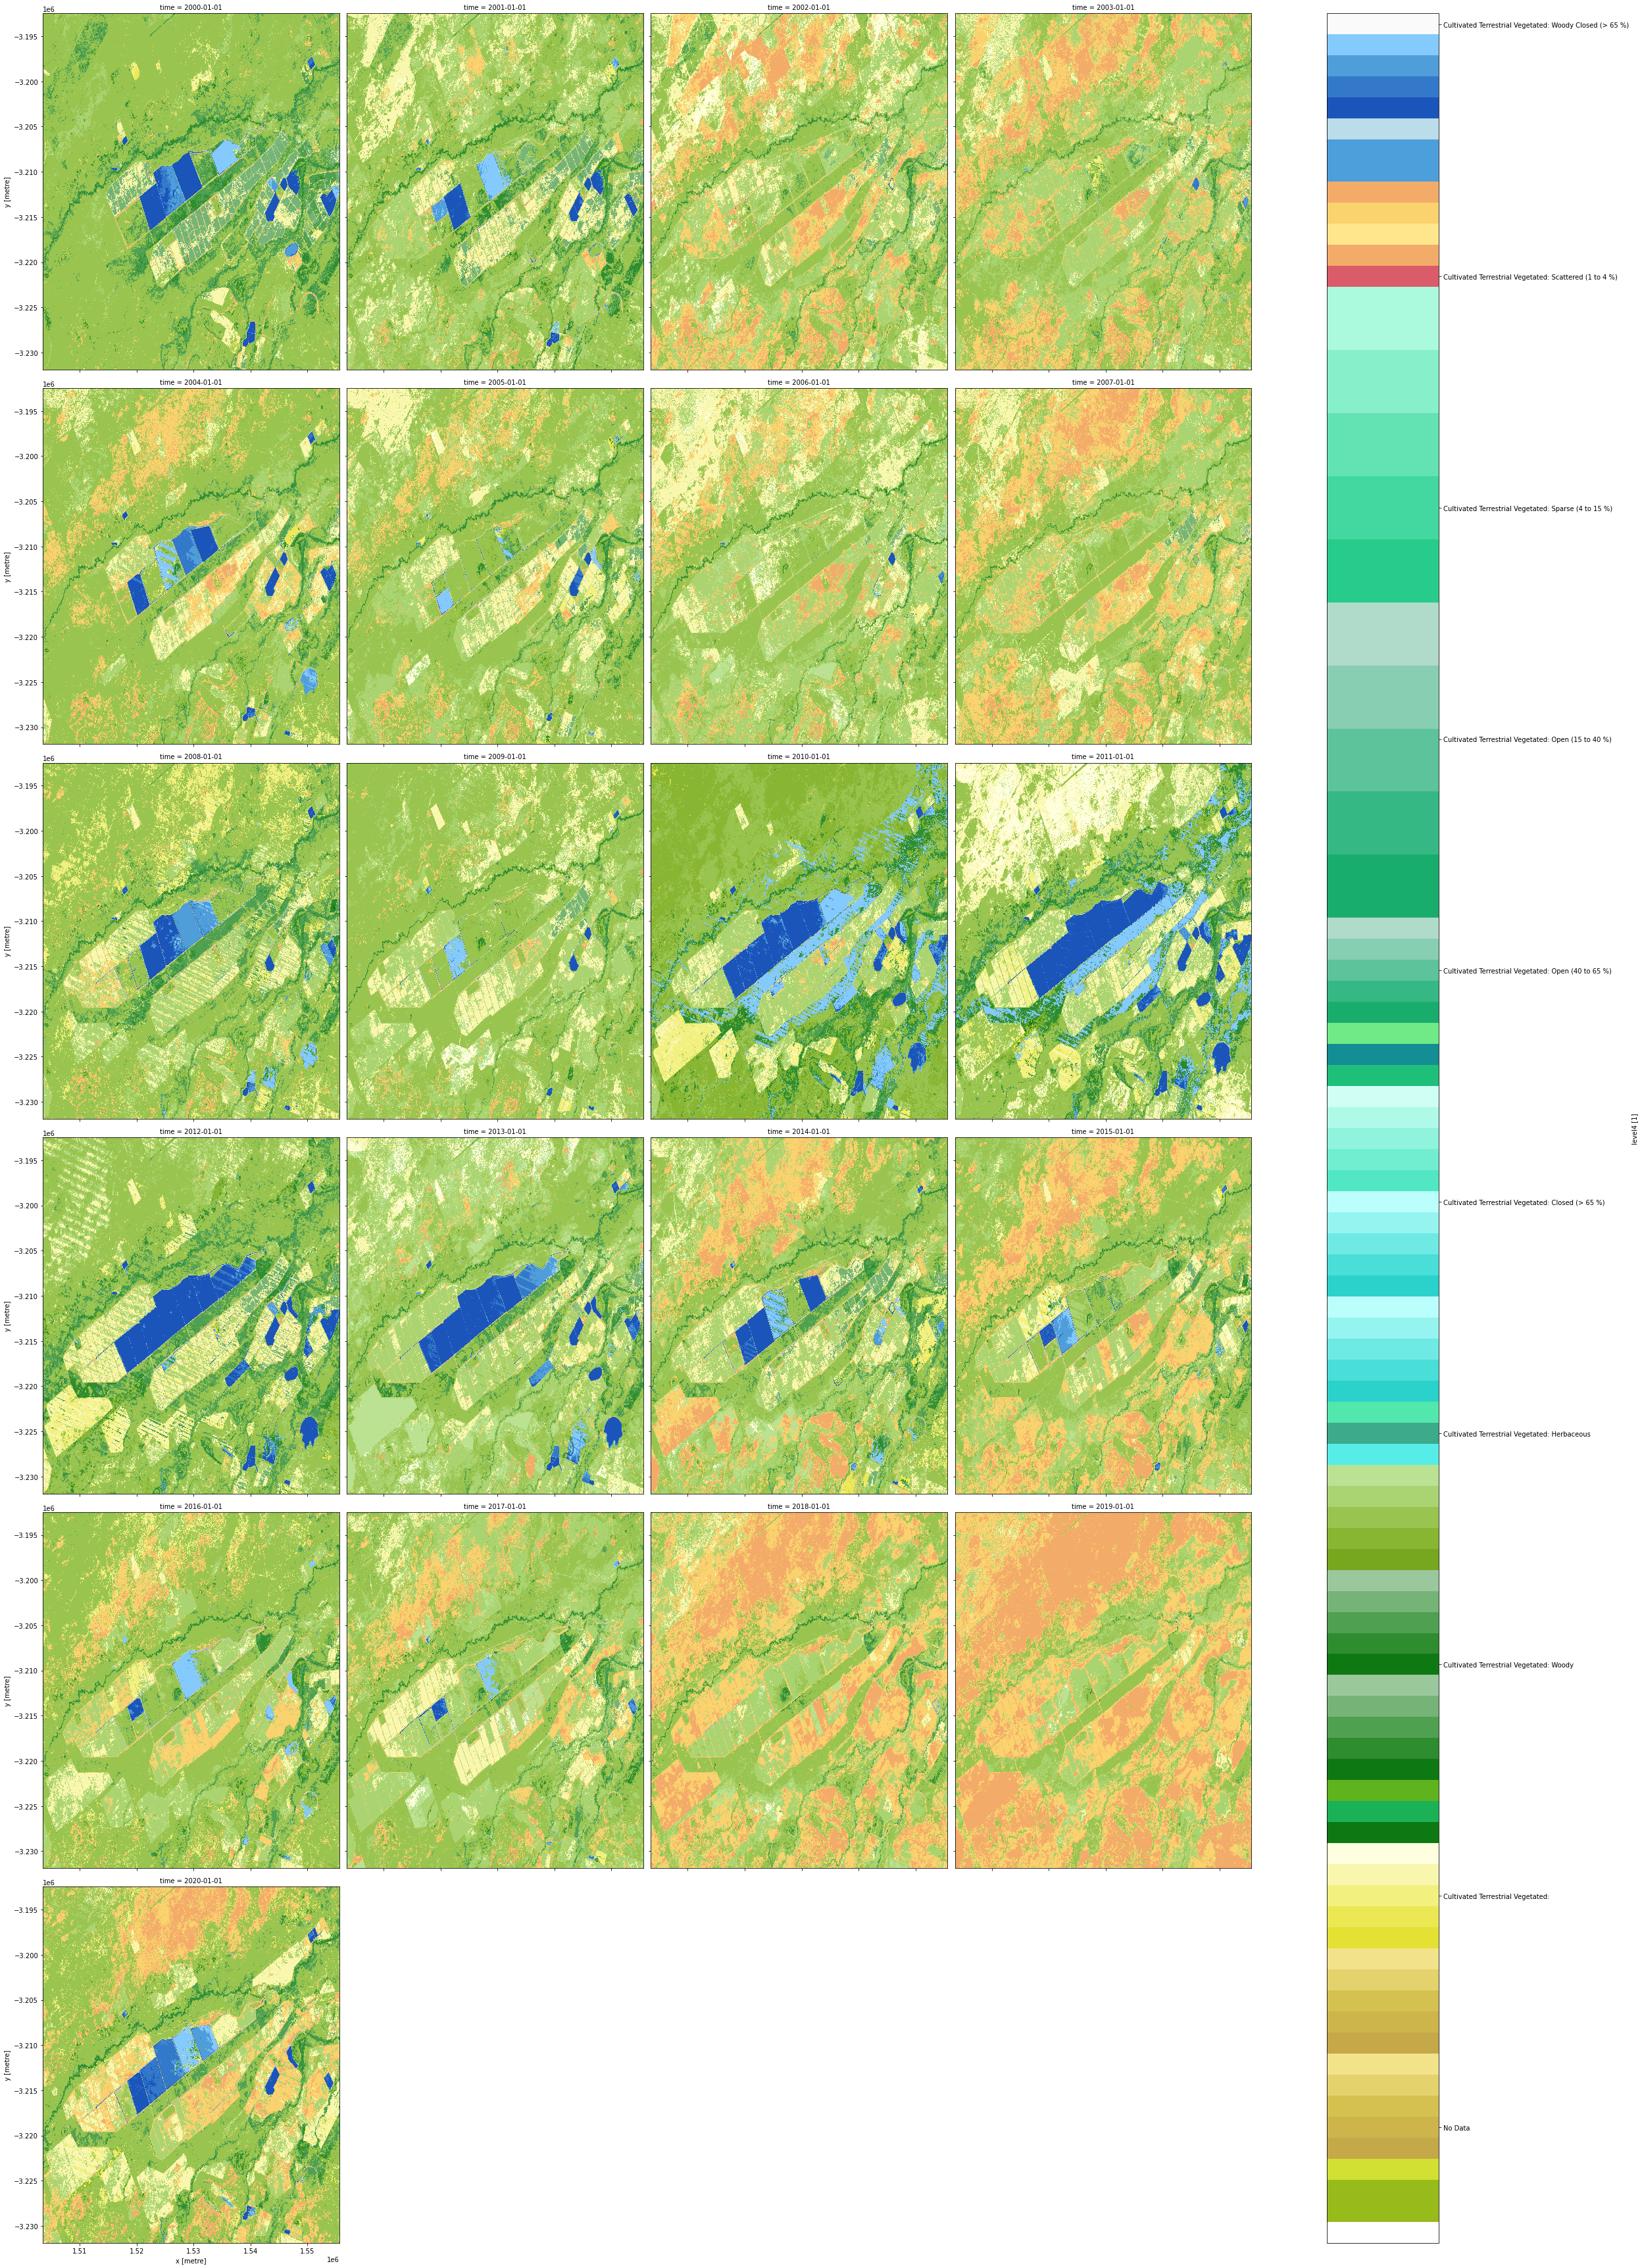

In [35]:
# Plot the provided layer
im = lc.level4.plot(cmap=l4_cmap, norm=l4_norm, add_colorbar=True, col='time', col_wrap=4, size=8)

cb = im.cbar
ticks = cb.get_ticks()
cb.set_ticks(ticks + np.diff(ticks, append=256)/2)
cb.set_ticklabels(l4_labels) 

### Use plot_land_cover for displaying land cover data

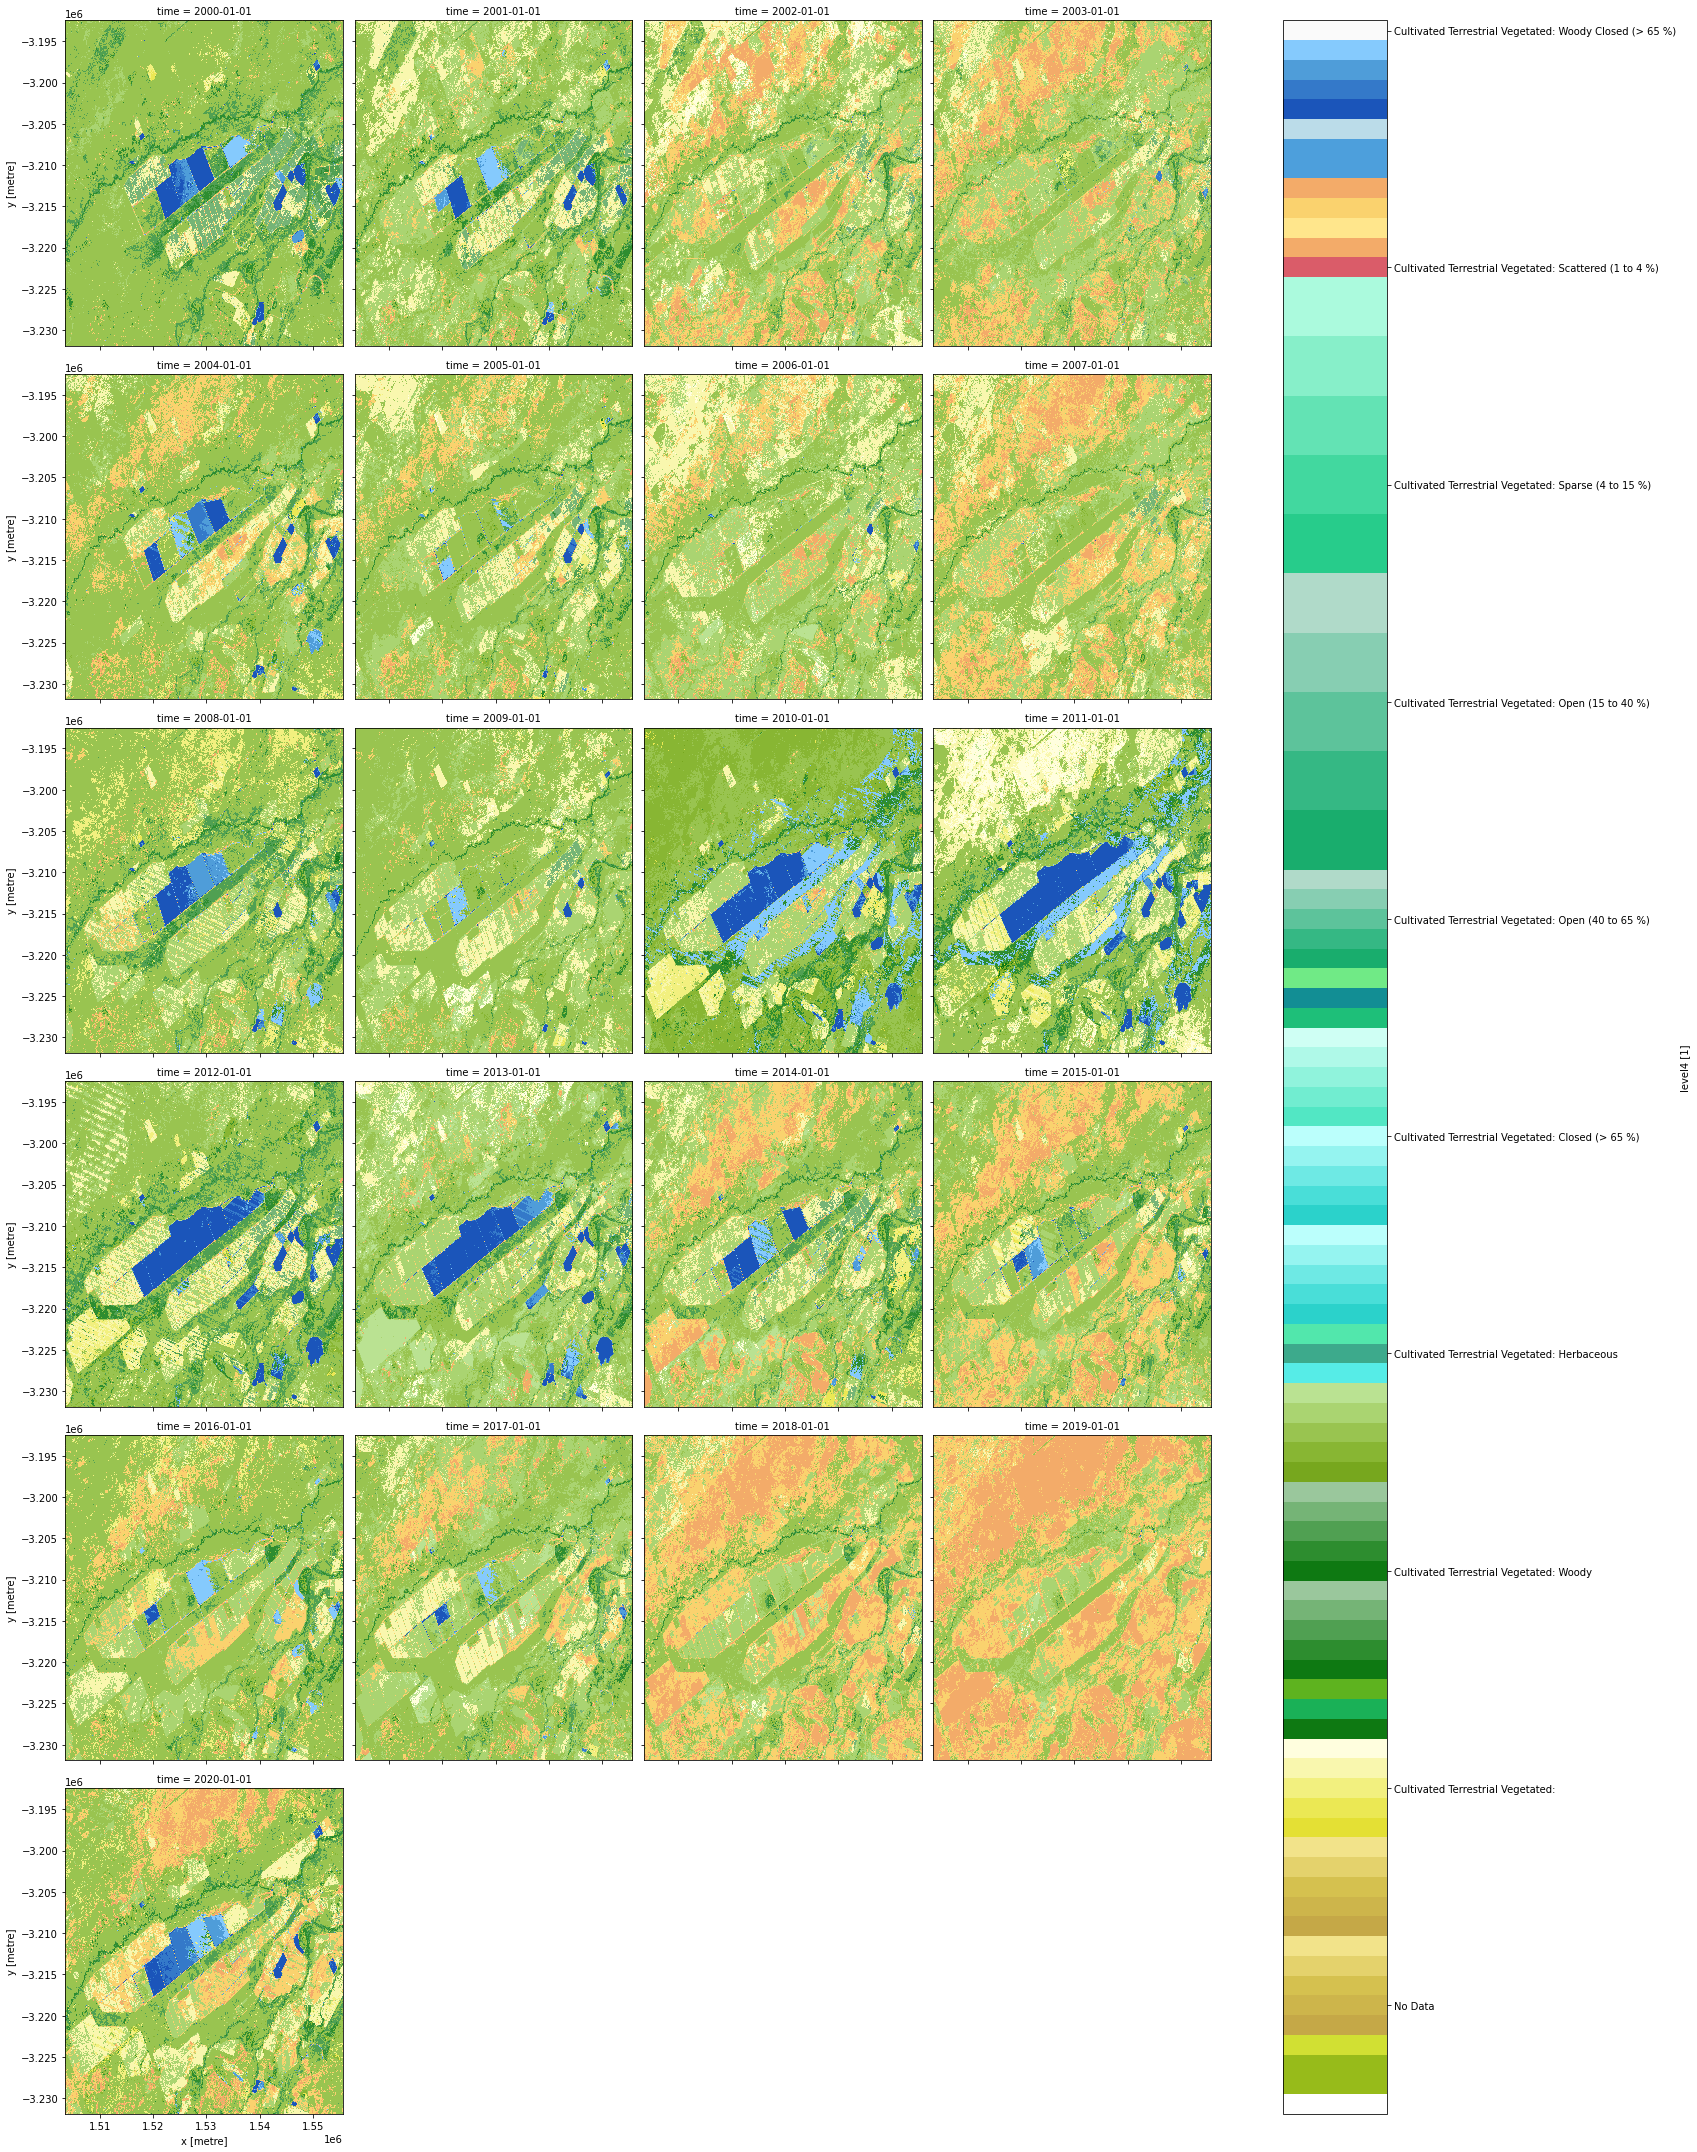

In [36]:
# display all loaded sections for level 4
plot_land_cover(lc.level4)

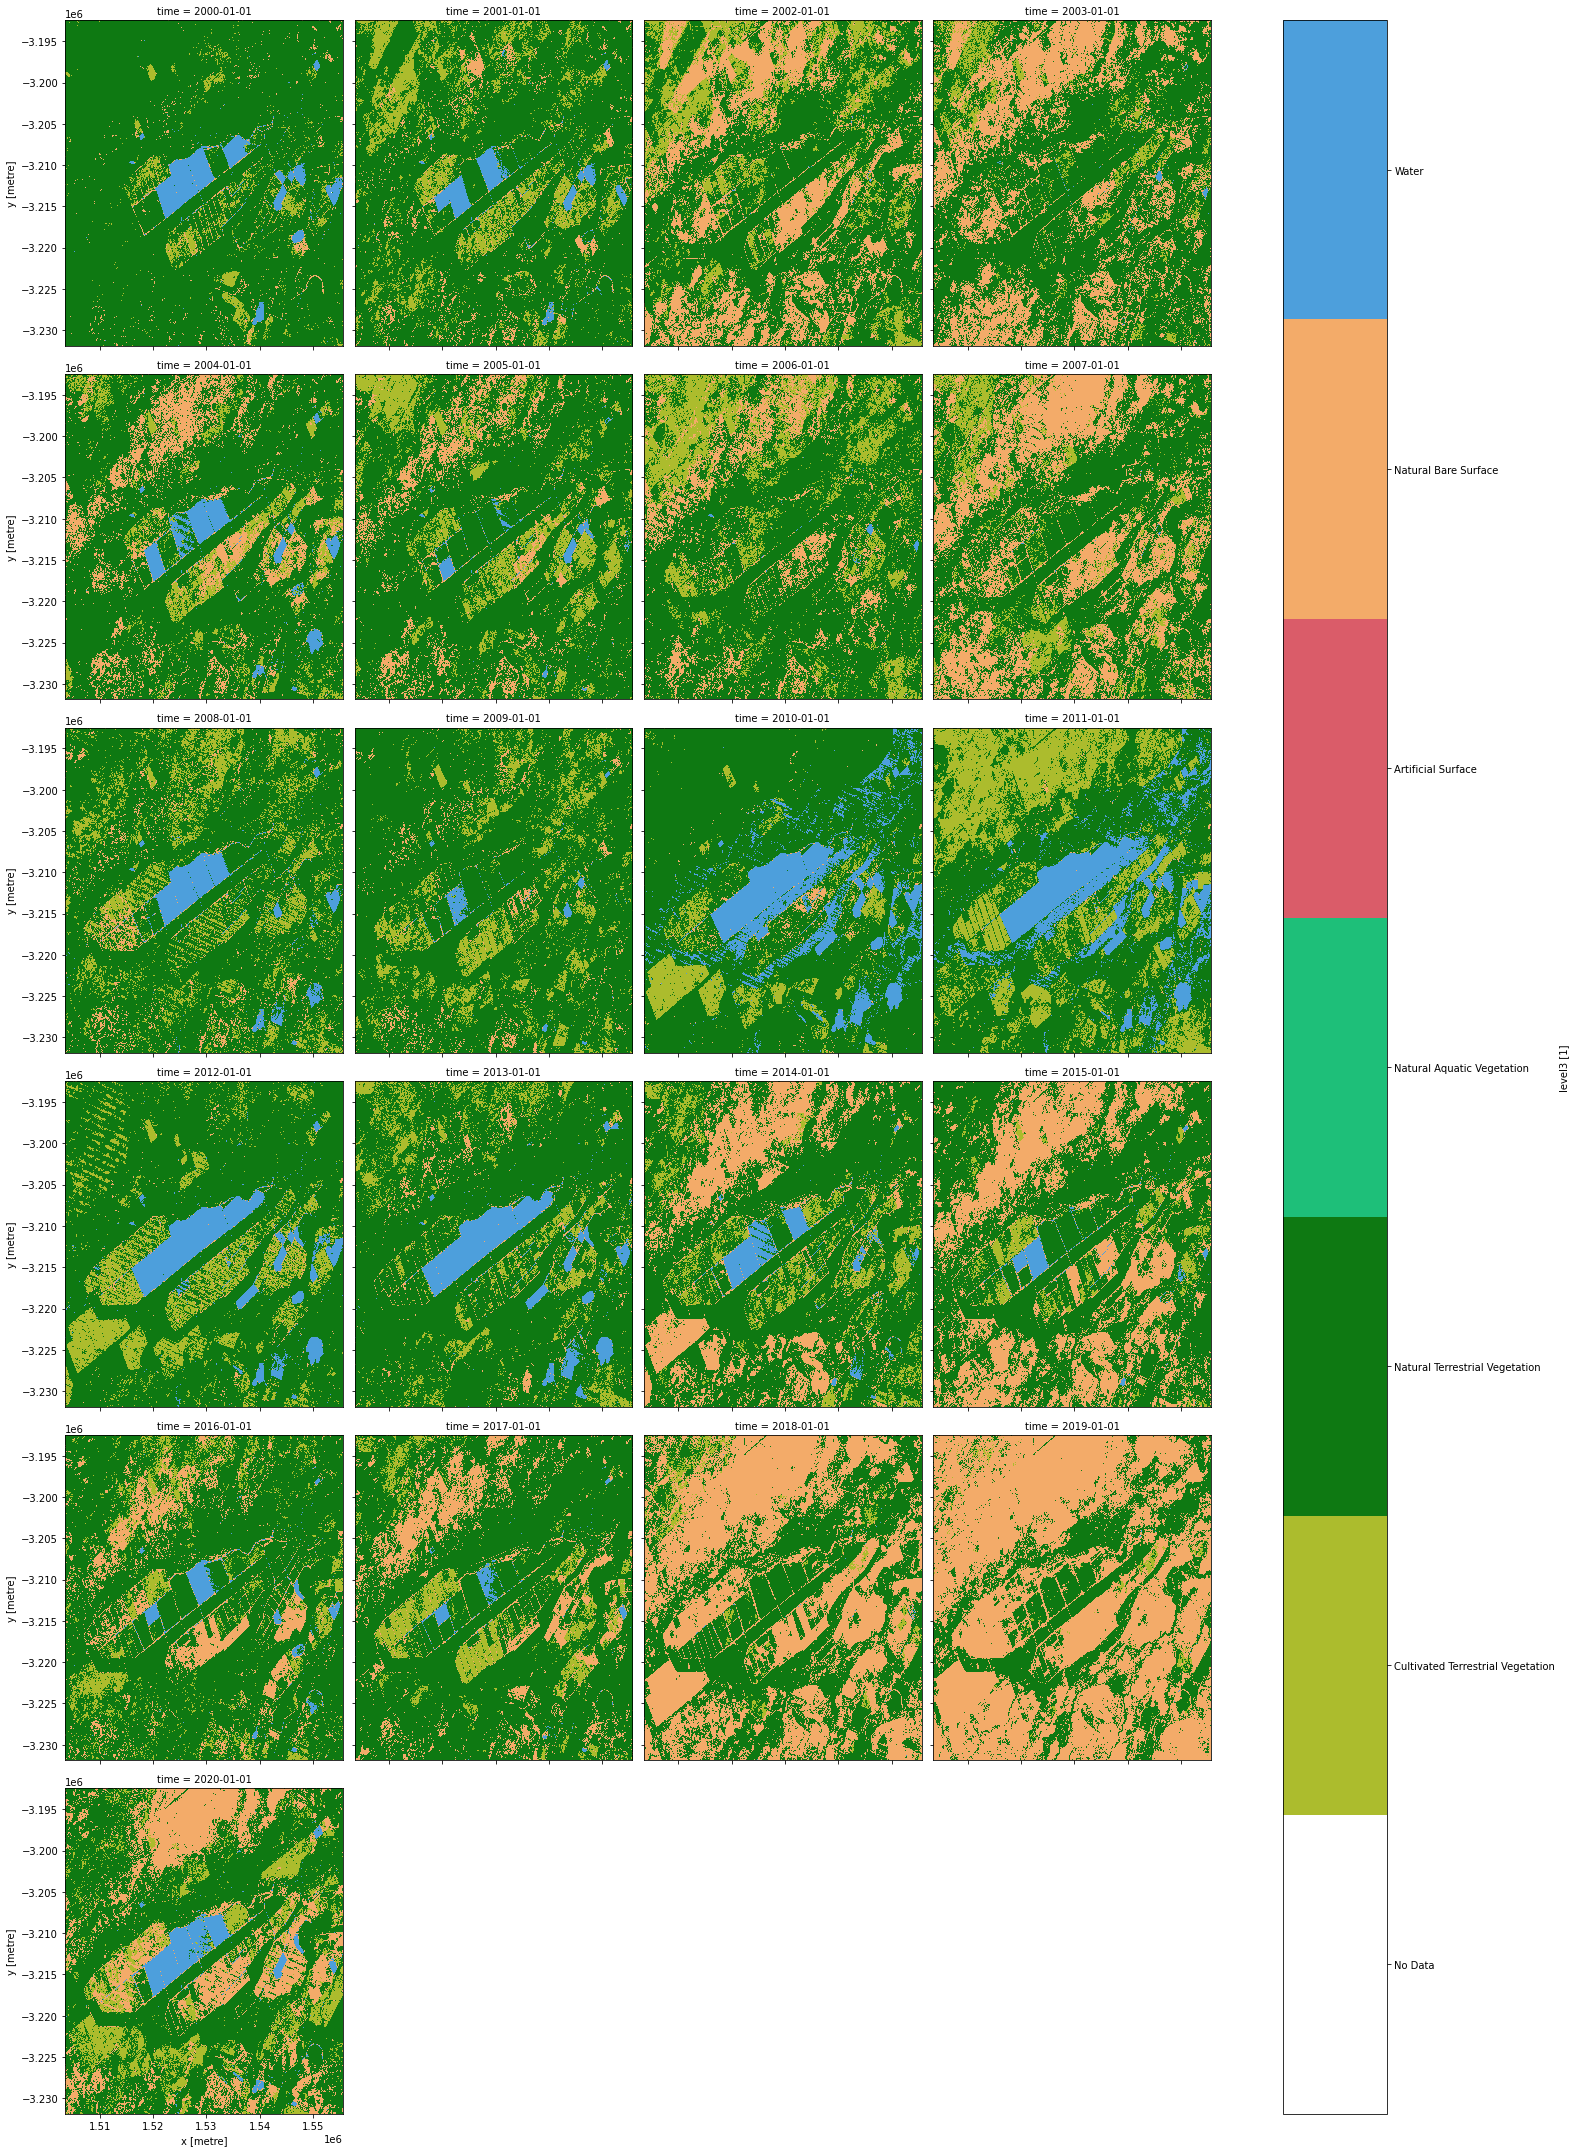

In [37]:
# and for level 3
plot_land_cover(lc.level3)

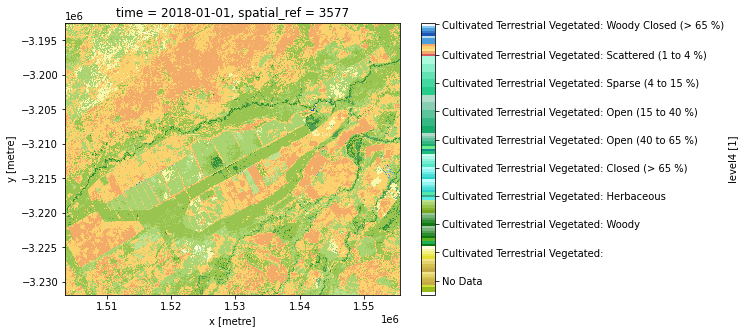

In [38]:
# display single time slice
plot_land_cover(lc.level4, year=2018)

### Create a land cover animation

In [ ]:
lc_animation(lc.level4,
    file_name="cubby_station_animation",
    layer="level4",
    stacked_plot=True,
    animation_interval=500,
    width_pixels=500,
    dpi=400,
)